**부스팅 모델 풀네임과 의미**

---

XGBoost: `eXtreme`   `Gradient`  `Boosting`

- XG는 eXtreme Gradient의 약자로, `기존 그래디언트 부스팅(Gradient Boosting)에 비해 극도로 최적화되고 효율적인 알고리즘`이라는 의미를 강조합니다.

- 풀네임은 `극한의 경사 부스팅` 정도로 해석할 수 있습니다.

---

LightGBM: `Light`        `Gradient`       `Boosting`         `Machine`

GBM은 Gradient Boosting Machine의 약자입니다.

Light는 `모델의 학습 속도가 매우 빠르고 메모리 사용량이 적다`는 특징을 나타냅니다.

풀네임은 `가벼운 경사 부스팅 머신`으로 해석할 수 있습니다.

---

CatBoost: `Categorical` `Boosting`

Cat은 Categorical의 약자로, 이 모델이 `범주형(Categorical) 특성을 별도의 전처리 없이 자동으로 처리하는 기능을 내장`하고 있음을 의미합니다.

풀네임은 `범주형 부스팅`으로 해석할 수 있습니다.

---

📊 부스팅 모델: 성능 vs. 안정성
세 가지 부스팅 모델의 실습 결과를 바탕으로, 프로젝트 목표에 따라 어떤 모델이 더 적합한지 비교해 봅시다.

| 모델     | CatBoost      | XGBoost     | LightGBM     |
|----------|--------------|-------------|--------------|
| 최고 장점     | 성능<br>(**높은 평균 정확도**)      | 안정성<br>(**낮은 표준편차**)     | 속도<br>(**가장 빠른 학습**)    |    
| 추천 프로젝트 | 최고의 `예측 정확도`가 중요한 프로젝트 | `결과의 일관성`이 중요한 프로젝트 (예: 금융, 의료) | `대규모 데이터를 빠르게 처리`해야 하는 프로젝트  |        

======
====

결론: 무엇이 더 뛰어난가?
모델의 **성능**, **안정성**, **속도** 중 `어느 것이 더 중요하다고 단정할 수 없습니다`.

### 모델 선택의 보편적 기준

- 최고의 성능(높은 평균 정확도)을 원한다면, CatBoost처럼 평균 정확도가 가장 높은 모델을 선택하는 것이 좋습니다.

- 가장 안정적인(낮은 표준편차) 예측을 원한다면, XGBoost처럼 표준편차가 가장 낮은 모델을 선택하는 것이 더 나을 수 있습니다.

- 가장 빠른 학습 속도를 원한다면, LightGBM처럼 대규모 데이터 처리에 가장 빠른 학습 속도를 갖춘 모델을 선택하는 것이 좋습니다.

따라서 데이터의 특성과 프로젝트의 목적을 고려하여 가장 적합한 모델을 선택하는 것이 중요합니다.

---

### 부스팅 모델 성능 비교 실습 시작 ###

--- 교차 검증을 통한 모델 성능 평가 시작 ---

### XGBoost ###
각 폴드별 정확도: [0.96666667 0.96666667 0.93333333 0.93333333 0.96666667]
평균 정확도: 0.9533 (표준편차: 0.0163)
------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

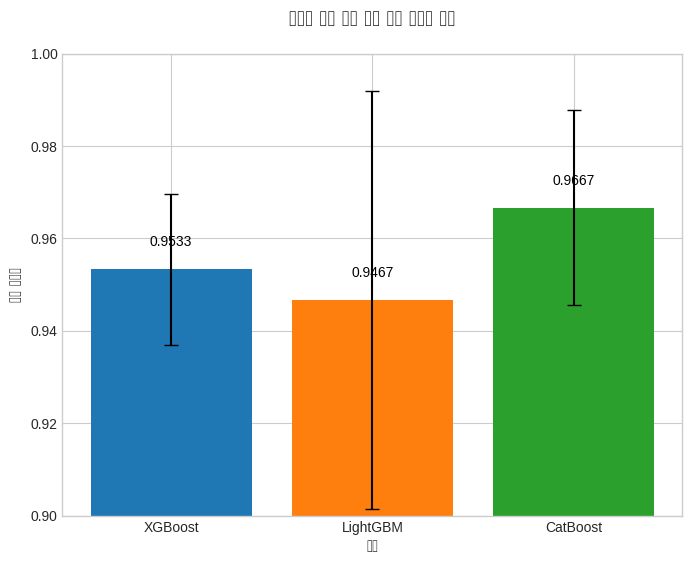

In [3]:
# BOOT-07_모델_성능_비교 실습 코드

# 1. 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 시각화를 위한 라이브러리 추가
import matplotlib.pyplot as plt
import numpy as np

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

print("### 부스팅 모델 성능 비교 실습 시작 ###")

# 2. 데이터셋 로드
# scikit-learn에서 제공하는 붓꽃(Iris) 데이터셋 사용
iris = load_iris()
X, y = iris.data, iris.target

# 3. 모델 정의
# 비교할 세 가지 부스팅 모델을 딕셔너리로 정의합니다.
models = {
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(silent=True, random_state=42)
}

print("\n--- 교차 검증을 통한 모델 성능 평가 시작 ---\n")

# 결과를 저장할 리스트 초기화
model_names = []
mean_scores = []
std_scores = []

# 4. 각 모델에 대한 파이프라인 생성 및 교차 검증 수행
for name, model in models.items():
    # 전처리와 모델 학습을 한 번에 처리하는 파이프라인 구축
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                ('classifier', model)])
    
    # 교차 검증 (cv=5)
    # 데이터셋을 5개의 폴드로 나누어 교차 검증을 진행합니다.
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    
    # 결과 저장
    model_names.append(name)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    
    # 교차 검증 결과 출력
    print(f"### {name} ###")
    print(f"각 폴드별 정확도: {scores}")
    print(f"평균 정확도: {scores.mean():.4f} (표준편차: {scores.std():.4f})")
    print("-" * 30)

print("### 부스팅 모델 성능 비교 실습 완료 ###")

# 5. 모델 성능 시각화
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

# 평균 정확도를 막대 그래프로 시각화하고, 표준편차를 오차 막대로 표시
ax.bar(model_names, mean_scores, yerr=std_scores, capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# 그래프 제목과 축 라벨 설정
ax.set_title('부스팅 모델 교차 검증 평균 정확도 비교', fontsize=16, pad=20)
ax.set_xlabel('모델', fontsize=12)
ax.set_ylabel('평균 정확도', fontsize=12)
ax.set_ylim(0.9, 1.0) # y축 범위를 0.9에서 1.0으로 제한하여 차이를 더 명확하게 보여줌

# 막대 위에 정확도 수치 표시
for i, v in enumerate(mean_scores):
    ax.text(i, v + 0.005, f'{v:.4f}', ha='center', color='black', fontsize=10)

# 그래프 표시
plt.show()



---

### 📊 부스팅 모델 최종 비교 결과 분석

---


1.  **XGBoost 결과**
    * **평균 정확도**: `0.9533`
    * **표준편차**: `0.0163`
    * **분석**: 세 모델 중 **`가장 낮은 표준편차`**를 기록했습니다. 
    * 이는 데이터가 바뀌더라도 성능의 변동폭이 가장 적어, `안정성 측면에서 가장 뛰어난 모델`임을 의미합니다.

2.  **LightGBM 결과**
    * **평균 정확도**: `0.9467`
    * **표준편차**: `0.0452`
    * **분석**: 세 모델 중 평균 정확도가 가장 낮고, 표준편차가 가장 높아 안정성 면에서는 아쉬운 결과를 보였습니다. 
    * 하지만 LightGBM의 진정한 강점은 데이터가 훨씬 클 때 드러나는 `압도적인 학습 속도`에 있습니다. 
    * 붓꽃 데이터는 너무 작아서 이 장점이 부각되지 않았을 뿐입니다.

3.  **CatBoost 결과**
    * **평균 정확도**: `0.9667`
    * **표준편차**: `0.0211`
    * **분석**: 세 모델 중 `가장 높은 평균 정확도`를 기록했습니다. 
    * 이는 `전반적인 예측 성능이 가장 뛰어나다는 것`을 보여줍니다. 
    * 표준편차도 XGBoost 다음으로 낮아 안정성도 꽤 우수했습니다.

---

### 🏆 최종 결론

세 가지 모델은 모두 붓꽃 데이터셋에서 90% 이상의 높은 정확도를 기록하며 우수한 성능을 입증했습니다. 

하지만 세부적인 특징을 고려하면 다음과 같이 정리할 수 있습니다.

* **`최고의 성능`**을 원한다면, `CatBoost`가 `가장 높은 평균 정확도`를 기록했습니다.
* **`최고의 안정성`**을 원한다면, `XGBoost`가 `가장 낮은 표준편차`를 기록했습니다.
* **`대규모 데이터를 빠르게`** 처리해야 한다면, `LightGBM`이 좋은 선택이 됩니다.

---
